In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [4]:
base_path = './합본'
years = ['/22', '/23']
regions = ['/수도권', '/동부', '/서부', '/제주산간']
csv_types = ['/TL_csv/', '/VL_csv/']

file_names = ['tn_visit_area_info_방문지정보', 'tn_traveller_master_여행객 Master', 'tn_travel_여행', 'tn_tour_photo_관광사진',
            'tn_mvmn_consume_his_이동수단소비내역', 'tn_move_his_이동내역', 'tn_lodge_consume_his_숙박소비내역', 'tn_companion_info_동반자정보',
             'tn_adv_consume_his_사전소비내역', 'tn_activity_his_활동내역', 'tn_activity_consume_his_활동소비내역' ]

year_region_codes = {
    '/22': ['_A', '_B', '_C', '_D'],  # 22년도 수도권 A, 동부 B, 서부 C, 제주산간 D
    '/23': ['_E', '_F', '_G', '_H']   # 23년도 수도권 E, 동부 F, 서부 G, 제주산간 H
}

m_df =[]
year = '/23'

for file_name in file_names:
    dfs = []
    for region, code in zip(regions, year_region_codes[year]):
        for csv_type in csv_types:
            file_path = f"{base_path}{year}{region}{csv_type}{file_name}{code}.csv"
            df = pd.read_csv(file_path)
            dfs.append(df)
    mdf = pd.concat(dfs)
    m_df.append(mdf)
m_df_dict = {file_name: df for file_name, df in zip(file_names, m_df)} 

In [5]:
category_mapping = {
    1: '자가용(승용/승합/트럭 등등)',
    2: '렌터카(승용/승합/버스 등등)',
    3: '캠핑카(자차 및 렌탈)',
    4: '택시',
    5: '지하철',
    6: '고속전철(ITX 등)',
    7: 'KTX/SRT(고속열차)',
    8: '새마을/무궁화열차',
    9: '항공기',
    10: '배/선박',
    11: '관광버스',
    12: '시외/고속버스',
    13: '시내/마을버스',
    14: '자전거',
    15: '도보',
    16: '기타',
    50: '버스 + 지하철'
}

In [6]:
simple_category_mapping = {
    '자가용(승용/승합/트럭 등등)' : '자가용',
    '렌터카(승용/승합/버스 등등)' : '렌터카',
    '캠핑카(자차 및 렌탈)' : '렌터카',
    '택시' : '택시',
    '지하철' : '지하철',
    '고속전철(ITX 등)' : '기차',
    'KTX/SRT(고속열차)' : '기차',
    '새마을/무궁화열차' : '기차',
    '항공기' : '항공기',
    '배/선박' : '배/선박',
    '관광버스' : '버스',
    '시외/고속버스' : '버스',
    '시내/마을버스' : '버스',
    '자전거' : '도보',
    '도보' : '도보',
    '기타' : '기타'
}

In [7]:
accompany_mapping = {
    '2인 여행(가족 외)' : 0,
    '자녀 동반 여행' : 1,
    '나홀로 여행' : 0,
    '3인 이상 여행(가족 외)' : 0,
    '2인 가족 여행' : 1,
    '부모 동반 여행' : 1,
    '3대 동반 여행(친척 포함)' : 1,
    '3인 이상 가족 여행(친척 포함)' : 1
}

In [8]:
mv = m_df_dict['tn_move_his_이동내역']
mv

,TRAVEL_ID,TRIP_ID,START_VISIT_AREA_ID,END_VISIT_AREA_ID,START_DT_MIN,END_DT_MIN,MVMN_CD_1,MVMN_CD_2
0,e_e000004,2304300001,2.304300e+09,NaN,2023-04-30 13:30,NaN,NaN,NaN
1,e_e000004,2304300002,NaN,2.304300e+09,NaN,2023-04-30 14:00,1.0,NaN
2,e_e000004,2304300003,NaN,2.304300e+09,NaN,2023-04-30 15:00,15.0,NaN
3,e_e000004,2304300004,NaN,2.304300e+09,NaN,2023-04-30 15:30,15.0,NaN
4,e_e000004,2304300005,NaN,2.304300e+09,NaN,2023-04-30 17:30,1.0,NaN
...,...,...,...,...,...,...,...,...
5582,h_h006753,2309230002,NaN,2.309230e+09,NaN,2023-09-23 19:00,1.0,NaN
5583,h_h006753,2309230003,NaN,2.309230e+09,NaN,2023-09-23 02:30,1.0,NaN
5584,h_h006753,2309230004,NaN,2.309230e+09,NaN,2023-09-23 03:00,1.0,NaN
5585,h_h006753,2309240001,NaN,2.309240e+09,NaN,2023-09-24 14:30,1.0,NaN


In [9]:
vst = m_df_dict['tn_visit_area_info_방문지정보']
vst

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,POI_NM,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD
0,2304300001,e_e000004,1,집,2023-04-30,2023-04-30,NaN,NaN,NaN,NaN,...,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,4.159012e+09
1,2304300002,e_e000004,2,화성 관광열차 안내소 연무대 매표소,2023-04-30,2023-04-30,경기 수원시 팔달구 창룡대로103번길 20,경기 수원시 팔달구 매향동 3-32,127.023339,37.287878,...,동대문종합시장 악세서리부자재시장,60.0,2,N,10.0,NaN,4.0,3.0,4.0,NaN
2,2304300003,e_e000004,3,창룡문,2023-04-30,2023-04-30,NaN,경기 수원시 팔달구 남수동,127.025143,37.287791,...,창룡문,30.0,2,N,1.0,NaN,4.0,4.0,4.0,NaN
3,2304300004,e_e000004,4,수원 화성 화홍문,2023-04-30,2023-04-30,NaN,경기 수원시 팔달구 북수동 9000-1,127.017626,37.287546,...,수원화성 화홍문,60.0,2,N,10.0,NaN,4.0,3.0,3.0,NaN
4,2304300005,e_e000004,5,집,2023-04-30,2023-05-01,NaN,NaN,NaN,NaN,...,NaN,390.0,21,NaN,NaN,NaN,NaN,NaN,NaN,4.159012e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5582,2309230002,h_h006753,4,롯데호텔 제주,2023-09-23,2023-09-24,제주특별자치도 서귀포시 중문관광로72번길 35,제주특별자치도 서귀포시 색달동 2812-4,126.410600,33.248457,...,롯데호텔 제주,300.0,24,Y,5.0,1.0,5.0,5.0,5.0,NaN
5583,2309230003,h_h006753,2,성이시돌목장,2023-09-23,2023-09-23,제주특별자치도 제주시 한림읍 금악동길 35,제주특별자치도 제주시 한림읍 금악리 142,126.327321,33.347770,...,성이시돌목장,30.0,7,Y,1.0,NaN,5.0,5.0,5.0,NaN
5584,2309230004,h_h006753,3,금오름,2023-09-23,2023-09-23,NaN,제주특별자치도 제주시 한림읍 금악리 산 1-1,126.305839,33.354572,...,금오름,30.0,1,N,2.0,NaN,5.0,5.0,5.0,NaN
5585,2309240001,h_h006753,6,집,2023-09-24,2023-09-25,독짓골2길 19,NaN,NaN,NaN,...,NaN,570.0,21,NaN,NaN,NaN,NaN,NaN,NaN,5.011010e+09


In [10]:
mv.rename(columns={'TRIP_ID' : 'VISIT_AREA_ID'}, inplace=True)

In [11]:
merged = pd.merge(mv, vst, on = ['TRAVEL_ID', "VISIT_AREA_ID"], how='inner')
merged

,TRAVEL_ID,VISIT_AREA_ID,START_VISIT_AREA_ID,END_VISIT_AREA_ID,START_DT_MIN,END_DT_MIN,MVMN_CD_1,MVMN_CD_2,VISIT_ORDER,VISIT_AREA_NM,...,POI_NM,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD
0,e_e000004,2304300001,2.304300e+09,NaN,2023-04-30 13:30,NaN,NaN,NaN,1,집,...,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,4.159012e+09
1,e_e000004,2304300002,NaN,2.304300e+09,NaN,2023-04-30 14:00,1.0,NaN,2,화성 관광열차 안내소 연무대 매표소,...,동대문종합시장 악세서리부자재시장,60.0,2,N,10.0,NaN,4.0,3.0,4.0,NaN
2,e_e000004,2304300003,NaN,2.304300e+09,NaN,2023-04-30 15:00,15.0,NaN,3,창룡문,...,창룡문,30.0,2,N,1.0,NaN,4.0,4.0,4.0,NaN
3,e_e000004,2304300004,NaN,2.304300e+09,NaN,2023-04-30 15:30,15.0,NaN,4,수원 화성 화홍문,...,수원화성 화홍문,60.0,2,N,10.0,NaN,4.0,3.0,3.0,NaN
4,e_e000004,2304300005,NaN,2.304300e+09,NaN,2023-04-30 17:30,1.0,NaN,5,집,...,NaN,390.0,21,NaN,NaN,NaN,NaN,NaN,NaN,4.159012e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140550,h_h006753,2309230002,NaN,2.309230e+09,NaN,2023-09-23 19:00,1.0,NaN,4,롯데호텔 제주,...,롯데호텔 제주,300.0,24,Y,5.0,1.0,5.0,5.0,5.0,NaN
140551,h_h006753,2309230003,NaN,2.309230e+09,NaN,2023-09-23 02:30,1.0,NaN,2,성이시돌목장,...,성이시돌목장,30.0,7,Y,1.0,NaN,5.0,5.0,5.0,NaN
140552,h_h006753,2309230004,NaN,2.309230e+09,NaN,2023-09-23 03:00,1.0,NaN,3,금오름,...,금오름,30.0,1,N,2.0,NaN,5.0,5.0,5.0,NaN
140553,h_h006753,2309240001,NaN,2.309240e+09,NaN,2023-09-24 14:30,1.0,NaN,6,집,...,NaN,570.0,21,NaN,NaN,NaN,NaN,NaN,NaN,5.011010e+09


In [12]:
merged.count()

TRAVEL_ID              140555
VISIT_AREA_ID          140555
START_VISIT_AREA_ID     11529
END_VISIT_AREA_ID      129026
START_DT_MIN            11529
END_DT_MIN             129026
MVMN_CD_1              129026
MVMN_CD_2               17290
VISIT_ORDER            140555
VISIT_AREA_NM          140555
VISIT_START_YMD        140555
VISIT_END_YMD          140555
ROAD_NM_ADDR           119554
LOTNO_ADDR             114866
X_COORD                108237
Y_COORD                108237
ROAD_NM_CD               6173
LOTNO_CD                 6173
POI_ID                 108871
POI_NM                 108871
RESIDENCE_TIME_MIN     129026
VISIT_AREA_TYPE_CD     140555
REVISIT_YN             115476
VISIT_CHC_REASON_CD    115554
LODGING_TYPE_CD         13400
DGSTFN                 115445
REVISIT_INTENTION      115445
RCMDTN_INTENTION       115445
SGG_CD                  26106
dtype: int64

In [13]:
movement = merged[['TRAVEL_ID', 'VISIT_AREA_ID', 'VISIT_AREA_NM', 'MVMN_CD_1', 'X_COORD', 'Y_COORD']]
movement

,TRAVEL_ID,VISIT_AREA_ID,VISIT_AREA_NM,MVMN_CD_1,X_COORD,Y_COORD
0,e_e000004,2304300001,집,NaN,NaN,NaN
1,e_e000004,2304300002,화성 관광열차 안내소 연무대 매표소,1.0,127.023339,37.287878
2,e_e000004,2304300003,창룡문,15.0,127.025143,37.287791
3,e_e000004,2304300004,수원 화성 화홍문,15.0,127.017626,37.287546
4,e_e000004,2304300005,집,1.0,NaN,NaN
...,...,...,...,...,...,...
140550,h_h006753,2309230002,롯데호텔 제주,1.0,126.410600,33.248457
140551,h_h006753,2309230003,성이시돌목장,1.0,126.327321,33.347770
140552,h_h006753,2309230004,금오름,1.0,126.305839,33.354572
140553,h_h006753,2309240001,집,1.0,NaN,NaN


In [14]:
# 이전 위치의 X_COORD와 Y_COORD를 포함한 데이터프레임 생성
movement['PREV_X_COORD'] = movement.groupby('TRAVEL_ID')['X_COORD'].shift(1)
movement['PREV_Y_COORD'] = movement.groupby('TRAVEL_ID')['Y_COORD'].shift(1)

C:\Users\PC\AppData\Local\Temp\ipykernel_7776\3478385372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement['PREV_X_COORD'] = movement.groupby('TRAVEL_ID')['X_COORD'].shift(1)
C:\Users\PC\AppData\Local\Temp\ipykernel_7776\3478385372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement['PREV_Y_COORD'] = movement.groupby('TRAVEL_ID')['Y_COORD'].shift(1)


In [15]:
merged_traveler = pd.read_csv('Mnmn_Traveler.csv')
merged_traveler

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,대중교통 등
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,대중교통 등
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,자가용
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,자가용
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,대중교통 등
...,...,...,...,...,...,...,...,...,...,...,...
11515,h000499,여,30,서울특별시,제주,부모 동반 여행,h_h000499,12;2;21;22;5,2023-06-06,2023-06-09,자가용
11516,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,자가용
11517,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,대중교통 등
11518,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,자가용


In [ ]:
# Group the data by AGE_GRP, TRAVEL_STATUS_ACCOMPANY, and LODGING_TYPE_CD, then count the occurrences
grouped_data = combined.groupby(['AGE_GRP']).size().reset_index()
grouped_data['normalized_count'] = grouped_data.groupby('TRAVEL_STATUS_ACCOMPANY',group_keys=False)['count'].apply(lambda x: x / x.sum())

# Display the grouped data for verification
display(grouped_data)

grouped_by_age = grouped_data.groupby('AGE_GRP')

# Set font for Korean display and avoid unicode minus issues
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Plotting the grouped data to visualize the count of each combination
plt.figure(figsize=(14, 10))
sns.barplot(
    data=grouped_data,
    x='AGE_GRP',
    y='normalized_count',
    hue='TRAVEL_STATUS_ACCOMPANY',
    dodge=True
)

# Set plot labels and title
plt.xlabel('Age Group (AGE_GRP)')
plt.ylabel('Count')
plt.title('Count of Lodging Types by Age Group and Travel Status Accompany')
plt.legend(title='Travel Status Accompany', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
merged['MVMN_CD_1'] = merged['MVMN_CD_1'].map(category_mapping)
merged['MVMN_CD_1'] = merged['MVMN_CD_1'].map(simple_category_mapping)

# 오른쪽 데이터프레임에서 TRAVEL_ID와 이동수단별 개수 집계
transport_counts = merged.groupby(['TRAVEL_ID', 'MVMN_CD_1']).size().reset_index(name='Count')

# 이동수단별 개수를 피벗 테이블 형태로 변환
transport_pivot = transport_counts.pivot(index='TRAVEL_ID', columns='MVMN_CD_1', values='Count').fillna(0)

# 결과를 왼쪽 데이터프레임과 병합
combined = pd.merge(merged_traveler, transport_pivot, on='TRAVEL_ID', how='left').fillna(0)
combined

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,...,기차,기타,도보,렌터카,배/선박,버스,자가용,지하철,택시,항공기
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,...,0.0,0.0,2.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,h000499,여,30,서울특별시,제주,부모 동반 여행,h_h000499,12;2;21;22;5,2023-06-06,2023-06-09,...,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0
11516,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,...,0.0,0.0,3.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0
11517,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,...,0.0,0.0,7.0,0.0,0.0,2.0,0.0,2.0,8.0,1.0
11518,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,...,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,2.0


In [16]:
combined.to_csv('traveler with trasports.csv')

NameError: name 'combined' is not defined

In [22]:
combined[['자가용', '렌터카', '택시', '지하철', '기차', '항공기', '배/선박', '버스', '도보']]

,자가용,렌터카,택시,지하철,기차,항공기,배/선박,버스,도보
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
11515,0.0,15.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
11516,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0
11517,0.0,0.0,8.0,2.0,0.0,1.0,0.0,2.0,7.0
11518,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [25]:
combined['합계'] = combined[['자가용', '렌터카', '택시', '지하철', '기차', '항공기', '배/선박', '버스', '도보']].sum(axis=1)

In [26]:
combined

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,...,기타,도보,렌터카,배/선박,버스,자가용,지하철,택시,항공기,합계
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,5.0
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,...,0.0,2.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,10.0
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,...,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,h000499,여,30,서울특별시,제주,부모 동반 여행,h_h000499,12;2;21;22;5,2023-06-06,2023-06-09,...,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,18.0
11516,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,...,0.0,3.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,10.0
11517,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,...,0.0,7.0,0.0,0.0,2.0,0.0,2.0,8.0,1.0,20.0
11518,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0


In [ ]:
# Filter data for '남성' and '여성' totals ('소계')
total_gender_data = combined[(combined['구분별(1)'].isin(['남성', '여성'])) & (combined['구분별(2)'] == '소계')]

# Pivot the data to prepare male and female totals for all years
total_gender_pivot = total_gender_data.pivot_table(
    index='구분별(1)', values=['2021', '2022', '2023'], aggfunc='sum'
)

# Calculate the gender difference (male - female) for each year
male_data = total_gender_pivot.loc['남성']
female_data = total_gender_pivot.loc['여성']
gender_difference = male_data - female_data

# Plotting the graph
plt.figure(figsize=(8, 5))
gender_difference.plot(kind='bar', alpha=0.8)
plt.title('Gender Difference in Car Ownership (Male - Female)', fontsize=14)
plt.ylabel('Difference in Number of Cars Owned', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [84]:
# 데이터 준비
df = combined.agg({
        '렌터카': 'mean', 
        '택시': 'mean',
        '지하철': 'mean',
        '기차': 'mean', 
        '항공기': 'mean', 
        '배/선박': 'mean', 
        '버스': 'mean'
}).reset_index()
df.columns = ['index', 'mean']
df

,index,mean
0,렌터카,1.717274
1,택시,0.495486
2,지하철,0.440365
3,기차,0.236372
4,항공기,0.196962
5,배/선박,0.051389
6,버스,0.837240


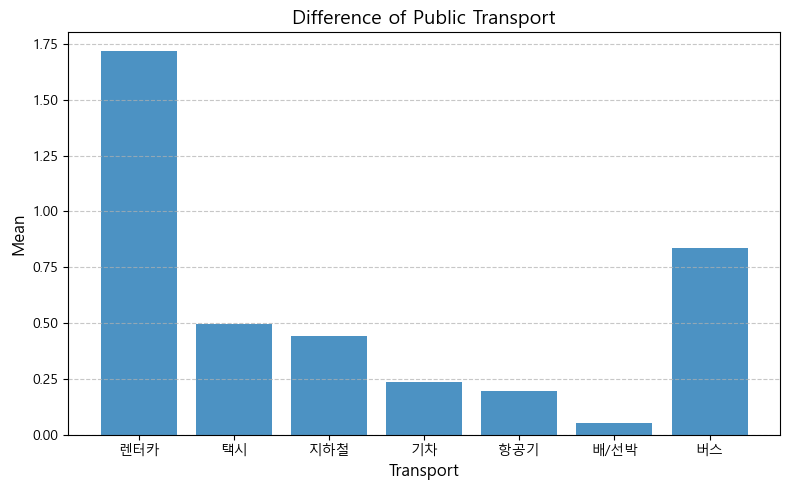

In [85]:
# Plotting
plt.figure(figsize=(8, 5))
plt.bar(df["index"], df["mean"], alpha=0.8)
plt.title('Difference of Public Transport', fontsize=14)
plt.ylabel('Mean', fontsize=12)
plt.xlabel('Transport', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

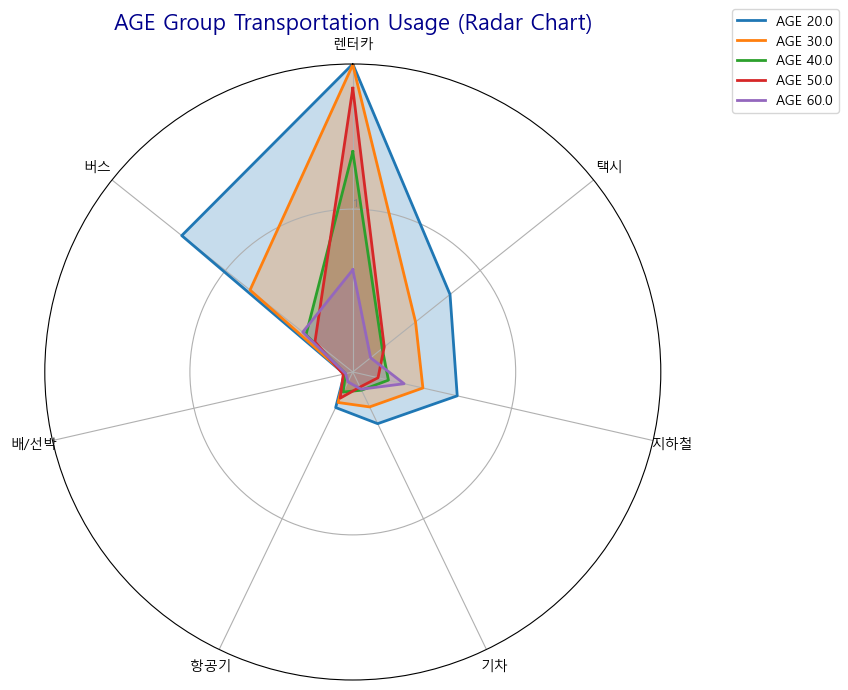

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터 준비
df = combined.groupby(['AGE_GRP']).agg({
        '렌터카': 'mean', 
        '택시': 'mean',
        '지하철': 'mean',
        '기차': 'mean', 
        '항공기': 'mean', 
        '배/선박': 'mean', 
        '버스': 'mean',
}).reset_index()


# Set font for Korean display and avoid unicode minus issues
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 레이더 차트를 위한 데이터 준비
categories = df.columns[1:]  # 교통수단
num_vars = len(categories)

# 각 연령대의 데이터를 레이더 차트에 맞게 재구성
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 마지막 데이터와 첫 데이터를 연결

# 플롯 설정
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in df.iterrows():
    values = row[1:].tolist()
    values += values[:1]  # 연결을 위해 첫 값을 추가
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'AGE {row["AGE_GRP"]}')
    ax.fill(angles, values, alpha=0.25)

# 카테고리와 레이블 설정
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# y축 설정
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=8)
plt.ylim(0, max(df.iloc[:, 1:].max()))

# 범례 추가
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 제목 설정
plt.title('AGE Group Transportation Usage (Radar Chart)', size=16, color='darkblue')

# 출력
plt.show()


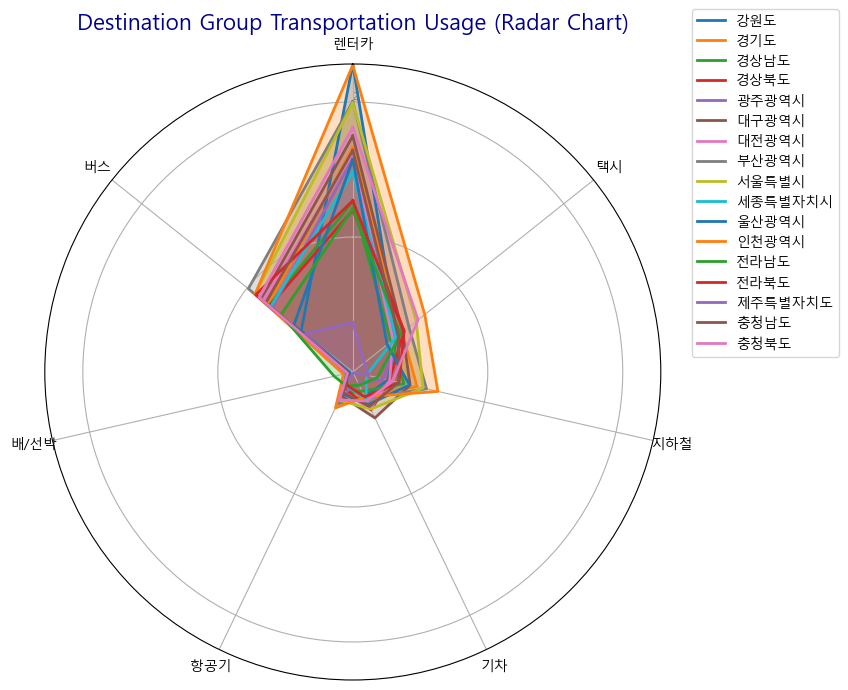

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터 준비
df = combined.groupby(['TRAVEL_STATUS_RESIDENCE']).agg({
        '렌터카': 'mean', 
        '택시': 'mean',
        '지하철': 'mean',
        '기차': 'mean', 
        '항공기': 'mean', 
        '배/선박': 'mean', 
        '버스': 'mean',
}).reset_index()


# Set font for Korean display and avoid unicode minus issues
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 레이더 차트를 위한 데이터 준비
categories = df.columns[1:]  # 교통수단
num_vars = len(categories)

# 각 연령대의 데이터를 레이더 차트에 맞게 재구성
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 마지막 데이터와 첫 데이터를 연결

# 플롯 설정
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in df.iterrows():
    values = row[1:].tolist()
    values += values[:1]  # 연결을 위해 첫 값을 추가
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'{row["TRAVEL_STATUS_RESIDENCE"]}')
    ax.fill(angles, values, alpha=0.25)

# 카테고리와 레이블 설정
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# y축 설정
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=8)
plt.ylim(0, max(df.iloc[:, 1:].max()))

# 범례 추가
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 제목 설정
plt.title('Destination Group Transportation Usage (Radar Chart)', size=16, color='darkblue')

# 출력
plt.show()

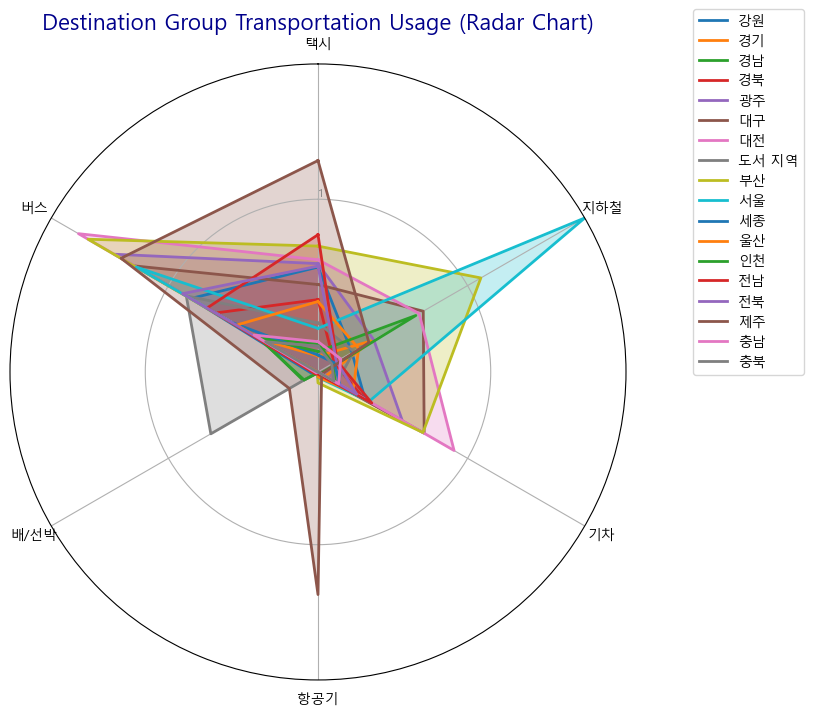

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터 준비
df = combined.groupby(['TRAVEL_STATUS_DESTINATION']).agg({
        #'렌터카': 'mean', 
        '택시': 'mean',
        '지하철': 'mean',
        '기차': 'mean', 
        '항공기': 'mean', 
        '배/선박': 'mean', 
        '버스': 'mean',
}).reset_index()


# Set font for Korean display and avoid unicode minus issues
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 레이더 차트를 위한 데이터 준비
categories = df.columns[1:]  # 교통수단
num_vars = len(categories)

# 각 연령대의 데이터를 레이더 차트에 맞게 재구성
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 마지막 데이터와 첫 데이터를 연결

# 플롯 설정
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in df.iterrows():
    values = row[1:].tolist()
    values += values[:1]  # 연결을 위해 첫 값을 추가
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'{row["TRAVEL_STATUS_DESTINATION"]}')
    ax.fill(angles, values, alpha=0.25)

# 카테고리와 레이블 설정
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# y축 설정
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=8)
plt.ylim(0, max(df.iloc[:, 1:].max()))

# 범례 추가
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 제목 설정
plt.title('Destination Group Transportation Usage (Radar Chart)', size=16, color='darkblue')

# 출력
plt.show()

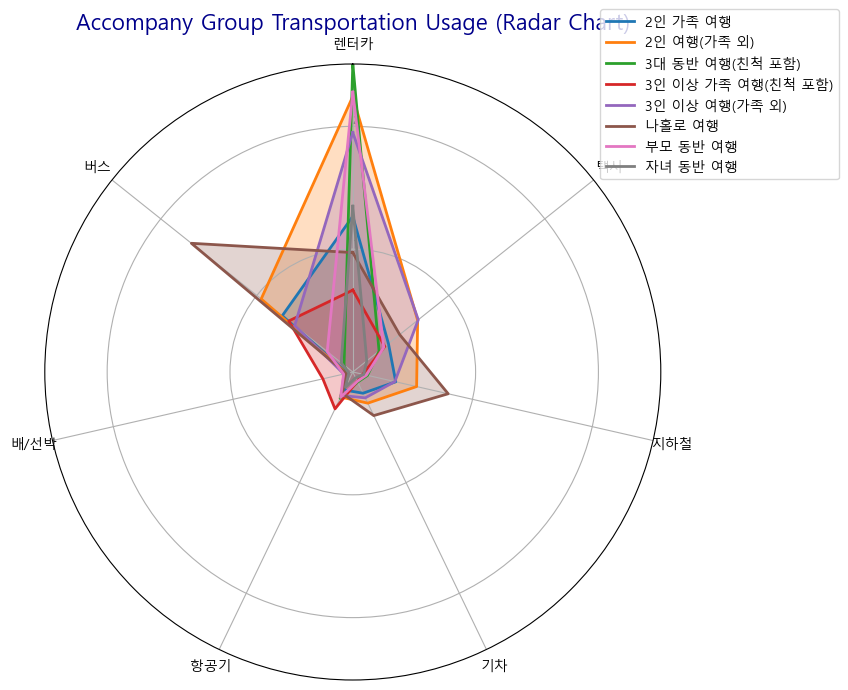

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터 준비
df = combined.groupby(['TRAVEL_STATUS_ACCOMPANY']).agg({
        '렌터카': 'mean', 
        '택시': 'mean',
        '지하철': 'mean',
        '기차': 'mean', 
        '항공기': 'mean', 
        '배/선박': 'mean', 
        '버스': 'mean',
}).reset_index()


# Set font for Korean display and avoid unicode minus issues
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 레이더 차트를 위한 데이터 준비
categories = df.columns[1:]  # 교통수단
num_vars = len(categories)

# 각 연령대의 데이터를 레이더 차트에 맞게 재구성
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 마지막 데이터와 첫 데이터를 연결

# 플롯 설정
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in df.iterrows():
    values = row[1:].tolist()
    values += values[:1]  # 연결을 위해 첫 값을 추가
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'{row["TRAVEL_STATUS_ACCOMPANY"]}')
    ax.fill(angles, values, alpha=0.25)

# 카테고리와 레이블 설정
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# y축 설정
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=8)
plt.ylim(0, max(df.iloc[:, 1:].max()))

# 범례 추가
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 제목 설정
plt.title('Accompany Group Transportation Usage (Radar Chart)', size=16, color='darkblue')

# 출력
plt.show()

In [48]:
df = combined.groupby(['GENDER']).agg({
        'MVMN_NM' : 'count'
}).reset_index()
df

,GENDER,MVMN_NM
0,남,4753
1,여,6767


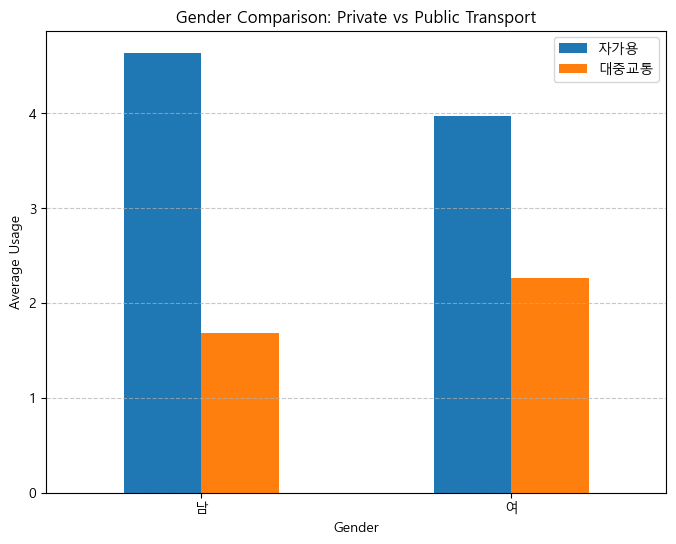

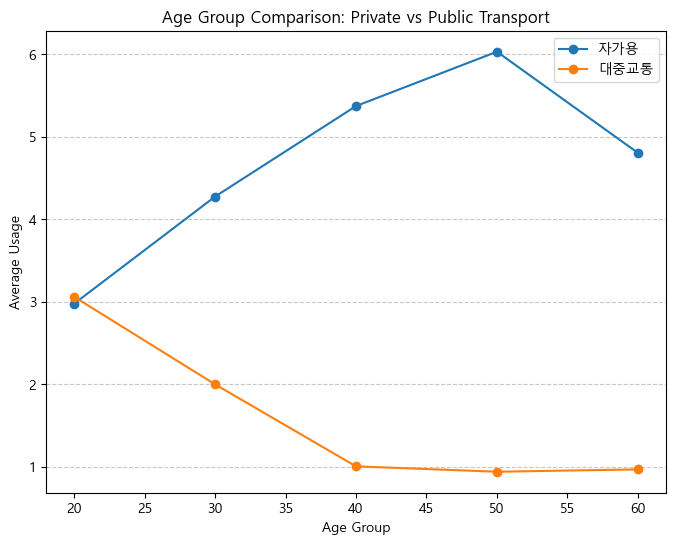

In [49]:
# 대중교통 이용량 합산
combined['대중교통'] = combined[['버스', '지하철', '택시', '배/선박', '항공기']].sum(axis=1)

# 성별에 따른 자가용 vs 대중교통 평균 이용량
gender_comparison = combined.groupby('GENDER')[['자가용', '대중교통']].mean()

# 연령대에 따른 자가용 vs 대중교통 평균 이용량
age_grp_comparison = combined.groupby('AGE_GRP')[['자가용', '대중교통']].mean()

# 시각화: 성별 비교
import matplotlib.pyplot as plt

# 성별 비교 시각화
gender_comparison.plot(kind='bar', figsize=(8, 6), title="Gender Comparison: Private vs Public Transport")
plt.xlabel("Gender")
plt.ylabel("Average Usage")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

# 시각화: 연령대 비교
age_grp_comparison.plot(kind='line', marker='o', figsize=(8, 6), title="Age Group Comparison: Private vs Public Transport")
plt.xlabel("Age Group")
plt.ylabel("Average Usage")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



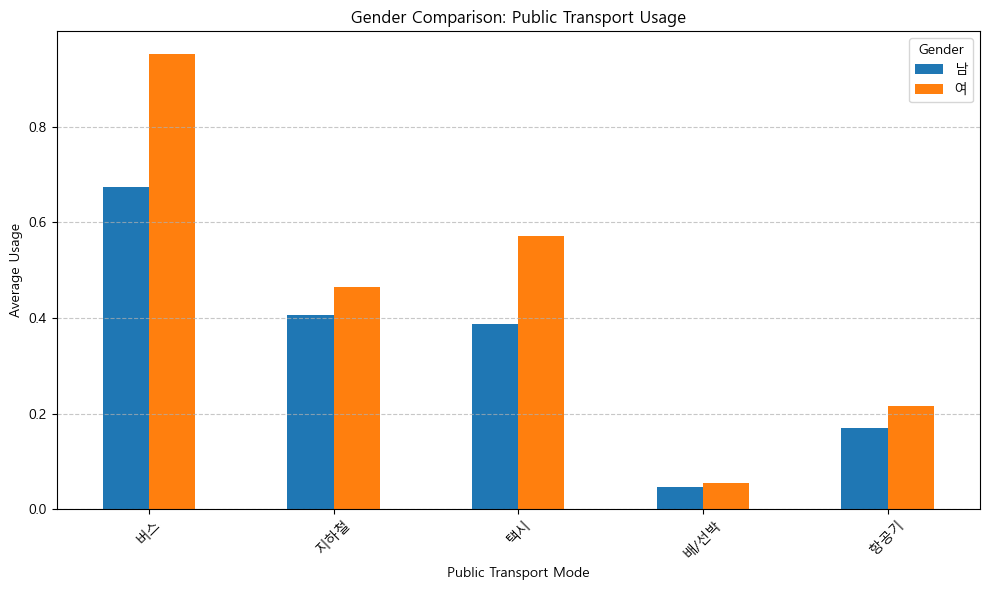

In [50]:
# 대중교통별 성별 이용량 평균 계산
public_transport_modes = ['버스', '지하철', '택시', '배/선박', '항공기']
gender_transport_comparison = combined.groupby('GENDER')[public_transport_modes].mean()

# 시각화: 성별 대중교통 이용 비교
gender_transport_comparison.T.plot(kind='bar', figsize=(10, 6), title="Gender Comparison: Public Transport Usage")
plt.xlabel("Public Transport Mode")
plt.ylabel("Average Usage")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


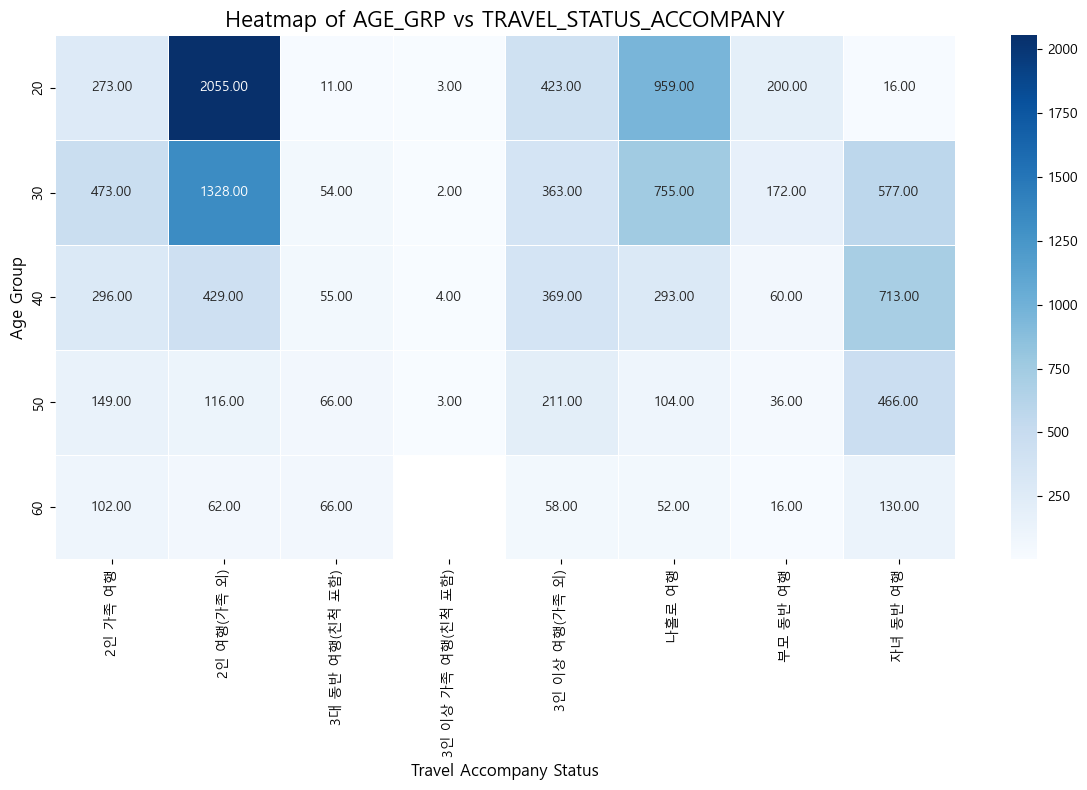

In [118]:
# 파일 다시 로드
import pandas as pd

# AGE_GRP과 TRAVEL_STATUS_ACCOMPANY 간 교차 테이블 생성
age_accompany_pivot = combined.pivot_table(
    index='AGE_GRP',
    columns='TRAVEL_STATUS_ACCOMPANY',
    values='TRAVEL_ID',
    aggfunc='count'
)

# 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(age_accompany_pivot, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)

# 그래프 제목 및 축 레이블 설정
plt.title('Heatmap of AGE_GRP vs TRAVEL_STATUS_ACCOMPANY', fontsize=16)
plt.xlabel('Travel Accompany Status', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.tight_layout()
plt.show()


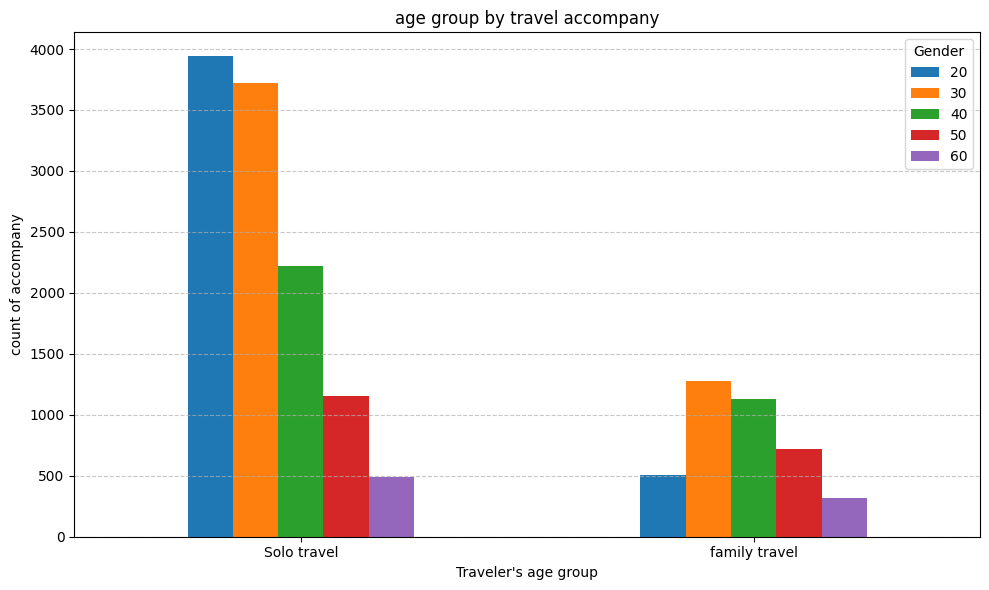

In [ ]:
# 데이터 준비
df = combined.copy()

df['ACCOMPANY'] = df['TRAVEL_STATUS_ACCOMPANY'].map(accompany_mapping)
grouped = df.groupby('AGE_GRP').agg({
    'TRAVEL_ID': 'count',
    'ACCOMPANY': 'sum'
})
grouped.columns = ['Solo travel', 'family travel']

# 겹치는 그래프 생성
grouped.plot(kind='bar', figsize=(10, 6), alpha=0.7, title="Comparison of Travel Accompany by Age Group")
plt.xlabel("Traveler's age group")
plt.ylabel("Count of accompany")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(title="Travel Type")
plt.tight_layout()
plt.show()


이동 수단 구하기 함수

In [13]:
import math

# X = 경도 / y = 위도
def haversine(lat1, lon1, lat2, lon2): 
    # 지구의 반지름 (킬로미터 단위)
    R = 6371.0
    
    # 위도와 경도를 라디안 단위로 변환
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    
    # 위도와 경도의 차이 계산
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad
    
    # 하버사인 공식 적용
    a = math.sin(delta_lat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # 거리 계산
    distance = R * c
    
    return distance

In [14]:
def filter_similar_rows(df, new_row, distance_threshold):
    df['START_DISTANCE'] = df.apply(
        lambda row: haversine(new_row['PREV_Y_COORD'], new_row['PREV_X_COORD'], row['PREV_Y_COORD'], row['PREV_X_COORD']),
        axis=1
    )
    df['END_DISTANCE'] = df.apply(
        lambda row: haversine(new_row['Y_COORD'], new_row['X_COORD'], row['Y_COORD'], row['X_COORD']),
        axis=1
    )
    # 시작과 끝 모두 기준 거리 이내인 행만 필터링
    filtered_df = df[
        (df['START_DISTANCE'] <= distance_threshold) &
        (df['END_DISTANCE'] <= distance_threshold)
    ]
    return filtered_df

In [ ]:
filterd = filter_similar_rows(movement[~(movement['X_COORD'].isna() | movement['PREV_X_COORD'].isna())], {'PREV_X_COORD': 127.0000, 'PREV_Y_COORD': 37.5600, 'X_COORD': 127.0300, 'Y_COORD': 37.5500}, 3)

C:\Users\PC\AppData\Local\Temp\ipykernel_26608\2800143423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START_DISTANCE'] = df.apply(
C:\Users\PC\AppData\Local\Temp\ipykernel_26608\2800143423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['END_DISTANCE'] = df.apply(


In [16]:
filterd['MVMN_CD_1'].value_counts()

MVMN_CD_1
15.0    123
5.0      24
13.0     15
1.0       9
4.0       5
11.0      1
Name: count, dtype: int64

유사 이동 루트 추출 Mark2

In [ ]:
temp = merged[['TRAVEL_ID', 'VISIT_AREA_ID', 'VISIT_AREA_NM', 'MVMN_CD_1', 'X_COORD', 'Y_COORD']]
input = {'PREV_X_COORD': 127.0000, 'PREV_Y_COORD': 37.5600, 'X_COORD': 127.0300, 'Y_COORD': 37.5500}
temp['START_DISTANCE'] = temp.apply(
        lambda row: haversine(input['PREV_Y_COORD'], input['PREV_X_COORD'], row['Y_COORD'], row['X_COORD']),
        axis=1
    )
temp['END_DISTANCE'] = temp.apply(
    lambda row: haversine(input['Y_COORD'], input['X_COORD'], row['Y_COORD'], row['X_COORD']),
    axis=1
)
temp['START'] = (temp['START_DISTANCE'] <= 1)
temp['END'] = (temp['END_DISTANCE'] <= 1)

C:\Users\PC\AppData\Local\Temp\ipykernel_26608\3628235835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['START_DISTANCE'] = temp.apply(
C:\Users\PC\AppData\Local\Temp\ipykernel_26608\3628235835.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['END_DISTANCE'] = temp.apply(
C:\Users\PC\AppData\Local\Temp\ipykernel_26608\3628235835.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [67]:
temp[temp['START'] | temp['END']]

,TRAVEL_ID,VISIT_AREA_ID,VISIT_AREA_NM,MVMN_CD_1,X_COORD,Y_COORD,START_DISTANCE,END_DISTANCE,START,END
283,e_e000302,2305210003,유즈풀아뜰리에,15.0,127.040466,37.546986,3.849566,0.981660,False,True
284,e_e000302,2305210004,서울숲,15.0,127.037618,37.544322,3.746502,0.921755,False,True
975,e_e000473,2305210002,서울숲,14.0,127.037618,37.544322,3.746502,0.921755,False,True
1320,e_e000563,2305290006,서울숲,4.0,127.037618,37.544322,3.746502,0.921755,False,True
1449,e_e000603,2305270006,호텔 PJ,5.0,126.995722,37.564794,0.653006,3.440400,True,False
...,...,...,...,...,...,...,...,...,...,...
114195,h_h001572,2306290008,어반스테이 명동,15.0,126.993390,37.563366,0.692499,3.552959,True,False
114196,h_h001572,2306300001,더데일리카페인 을지로,15.0,126.992376,37.564146,0.814973,3.670671,True,False
114198,h_h001572,2306300003,서울숲,15.0,127.037618,37.544322,3.746502,0.921755,False,True
114204,h_h001572,2306300009,어반스테이 명동,15.0,126.993390,37.563366,0.692499,3.552959,True,False


In [68]:
temp['MVMN_CD_1'] = temp['MVMN_CD_1'].map(category_mapping)
temp

C:\Users\PC\AppData\Local\Temp\ipykernel_26608\2690656479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['MVMN_CD_1'] = temp['MVMN_CD_1'].map(category_mapping)


,TRAVEL_ID,VISIT_AREA_ID,VISIT_AREA_NM,MVMN_CD_1,X_COORD,Y_COORD,START_DISTANCE,END_DISTANCE,START,END
0,e_e000004,2304300001,집,NaN,NaN,NaN,NaN,NaN,False,False
1,e_e000004,2304300002,화성 관광열차 안내소 연무대 매표소,자가용(승용/승합/트럭 등등),127.023339,37.287878,30.328706,29.152583,False,False
2,e_e000004,2304300003,창룡문,도보,127.025143,37.287791,30.349587,29.159465,False,False
3,e_e000004,2304300004,수원 화성 화홍문,도보,127.017626,37.287546,30.335516,29.204061,False,False
4,e_e000004,2304300005,집,자가용(승용/승합/트럭 등등),NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
140550,h_h006753,2309230002,롯데호텔 제주,자가용(승용/승합/트럭 등등),126.410600,33.248457,482.385165,481.589492,False,False
140551,h_h006753,2309230003,성이시돌목장,자가용(승용/승합/트럭 등등),126.327321,33.347770,472.320555,471.577109,False,False
140552,h_h006753,2309230004,금오름,자가용(승용/승합/트럭 등등),126.305839,33.354572,471.825209,471.093981,False,False
140553,h_h006753,2309240001,집,자가용(승용/승합/트럭 등등),NaN,NaN,NaN,NaN,False,False


In [69]:
# START=True와 END=True인 행 분리
start_points = temp[temp['START']][['TRAVEL_ID', 'X_COORD', 'Y_COORD', 'VISIT_AREA_ID']].rename(columns={'X_COORD': 'START_X', 'Y_COORD': 'START_Y', 'VISIT_AREA_ID': 'START_AREA'})
end_points = temp[temp['END']][['TRAVEL_ID', 'X_COORD', 'Y_COORD', 'VISIT_AREA_ID']].rename(columns={'X_COORD': 'END_X', 'Y_COORD': 'END_Y', 'VISIT_AREA_ID': 'END_AREA'})

# 같은 TRAVEL_ID 기준으로 모든 가능한 조합 생성
possible_routes = pd.merge(start_points, end_points, on='TRAVEL_ID')

# 순서 조건 (출발지가 도착지보다 순서 상 앞서야 함)
possible_routes = possible_routes[possible_routes['START_AREA'] < possible_routes['END_AREA']]

# 결과 정리
result = possible_routes[['TRAVEL_ID', 'START_AREA', 'END_AREA']]
result

,TRAVEL_ID,START_AREA,END_AREA
1,e_e000951,2306080004,2306080008
2,e_e000951,2306080004,2306090001
3,e_e003821,2306270003,2306270008
4,h_h001572,2306280002,2306300003
5,h_h001572,2306280005,2306300003
6,h_h001572,2306280006,2306300003
7,h_h001572,2306290001,2306300003
8,h_h001572,2306290004,2306300003
9,h_h001572,2306290006,2306300003
10,h_h001572,2306290008,2306300003


In [70]:
# START와 END 조건이 포함된 result를 기반으로 이동 수단 연결
def find_transport_modes(points, movement):
    transport_data = []
    for _, row in points.iterrows():
        travel_id = row['TRAVEL_ID']
        start_area = row['START_AREA']
        end_area = row['END_AREA']
        
        # 해당 경로의 모든 방문지 추출 (start_area부터 end_area까지)
        route = movement[
            (movement['TRAVEL_ID'] == travel_id) &
            (movement['VISIT_AREA_ID'] >= start_area) &
            (movement['VISIT_AREA_ID'] <= end_area)
        ].sort_values('VISIT_AREA_ID')  # 순서대로 정렬
        
        # 이동 수단 연결 (MVMN_CD_1)
        transport_modes = route['MVMN_CD_1'].tolist()
        transport_data.append({
            'TRAVEL_ID': travel_id,
            'START_AREA': start_area,
            'END_AREA': end_area,
            'TRANSPORT_MODES': ' -> '.join(transport_modes)  # 이동 수단을 연결
        })
    
    return pd.DataFrame(transport_data)

# 이동 수단 정보가 포함된 데이터프레임 생성
transport_result = find_transport_modes(result, temp)
transport_result

,TRAVEL_ID,START_AREA,END_AREA,TRANSPORT_MODES
0,e_e000951,2306080004,2306080008,도보 -> 도보 -> 도보 -> 도보 -> 지하철
1,e_e000951,2306080004,2306090001,도보 -> 도보 -> 도보 -> 도보 -> 지하철 -> 지하철 -> 지하철 -> 지하철
2,e_e003821,2306270003,2306270008,자가용(승용/승합/트럭 등등) -> 자가용(승용/승합/트럭 등등) -> 자가용(승용...
3,h_h001572,2306280002,2306300003,항공기 -> 도보 -> 도보 -> 도보 -> 도보 -> 도보 -> 도보 -> 도보 ...
4,h_h001572,2306280005,2306300003,도보 -> 도보 -> 도보 -> 도보 -> 도보 -> 도보 -> 도보 -> 도보 -...
5,h_h001572,2306280006,2306300003,도보 -> 도보 -> 도보 -> 도보 -> 도보 -> 도보 -> 도보 -> 도보 -...
6,h_h001572,2306290001,2306300003,도보 -> 도보 -> 도보 -> 도보 -> 도보 -> 도보 -> 도보 -> 도보 -...
7,h_h001572,2306290004,2306300003,도보 -> 도보 -> 도보 -> 도보 -> 도보 -> 시내/마을버스 -> 도보
8,h_h001572,2306290006,2306300003,도보 -> 도보 -> 도보 -> 도보 -> 시내/마을버스 -> 도보
9,h_h001572,2306290008,2306300003,도보 -> 도보 -> 시내/마을버스 -> 도보


In [71]:
def find_transport_modes(points, movement):
    transport_data = []
    for _, row in points.iterrows():
        travel_id = row['TRAVEL_ID']
        start_area = row['START_AREA']
        end_area = row['END_AREA']
        
        # 해당 경로의 모든 방문지 추출 (start_area부터 end_area까지)
        route = movement[
            (movement['TRAVEL_ID'] == travel_id) &
            (movement['VISIT_AREA_ID'] >= start_area) &
            (movement['VISIT_AREA_ID'] <= end_area)
        ].sort_values('VISIT_AREA_ID')  # 순서대로 정렬
        
        # 이동 수단 연결 (중복 제거)
        transport_modes = route['MVMN_CD_1'].tolist()
        compressed_modes = [transport_modes[0]]  # 첫 번째 이동 수단 추가
        for mode in transport_modes[1:]:
            if mode != compressed_modes[-1]:  # 이전 이동 수단과 다를 때만 추가
                compressed_modes.append(mode)
        
        # 결과 저장
        transport_data.append({
            'TRAVEL_ID': travel_id,
            'START_AREA': start_area,
            'END_AREA': end_area,
            'TRANSPORT_MODES': '->'.join(compressed_modes)  # 축약된 이동 수단 연결
        })
    
    # 출발지와 도착지가 동일한 경우 중복 제거
    transport_df = pd.DataFrame(transport_data)
    transport_df = transport_df.drop_duplicates(subset=['TRAVEL_ID', 'START_AREA', 'END_AREA'])
    
    return transport_df

# 이동 수단 정보가 포함된 데이터프레임 생성
transport_result = find_transport_modes(result, temp)
transport_result

,TRAVEL_ID,START_AREA,END_AREA,TRANSPORT_MODES
0,e_e000951,2306080004,2306080008,도보->지하철
1,e_e000951,2306080004,2306090001,도보->지하철
2,e_e003821,2306270003,2306270008,자가용(승용/승합/트럭 등등)->도보->자가용(승용/승합/트럭 등등)
3,h_h001572,2306280002,2306300003,항공기->도보->시내/마을버스->도보
4,h_h001572,2306280005,2306300003,도보->시내/마을버스->도보
5,h_h001572,2306280006,2306300003,도보->시내/마을버스->도보
6,h_h001572,2306290001,2306300003,도보->시내/마을버스->도보
7,h_h001572,2306290004,2306300003,도보->시내/마을버스->도보
8,h_h001572,2306290006,2306300003,도보->시내/마을버스->도보
9,h_h001572,2306290008,2306300003,도보->시내/마을버스->도보


In [102]:
def transport():
    import math
    
    # X = 경도 / y = 위도
    def haversine(lat1, lon1, lat2, lon2): 
        # 지구의 반지름 (킬로미터 단위)
        R = 6371.0
        
        # 위도와 경도를 라디안 단위로 변환
        lat1_rad = math.radians(lat1)
        lon1_rad = math.radians(lon1)
        lat2_rad = math.radians(lat2)
        lon2_rad = math.radians(lon2)
        
        # 위도와 경도의 차이 계산
        delta_lat = lat2_rad - lat1_rad
        delta_lon = lon2_rad - lon1_rad
        
        # 하버사인 공식 적용
        a = math.sin(delta_lat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        
        # 거리 계산
        distance = R * c
        
        return distance
    mv = m_df_dict['tn_move_his_이동내역']
    vst = m_df_dict['tn_visit_area_info_방문지정보']

    merged = pd.merge(mv, vst, on = ['TRAVEL_ID', "VISIT_AREA_ID"], how='inner')

    temp = merged[['TRAVEL_ID', 'VISIT_AREA_ID', 'VISIT_AREA_NM', 'MVMN_CD_1', 'X_COORD', 'Y_COORD']]
    input = {'PREV_X_COORD': 127.0000, 'PREV_Y_COORD': 37.5600, 'X_COORD': 127.0300, 'Y_COORD': 37.5500}
    temp['START_DISTANCE'] = temp.apply(
            lambda row: haversine(input['PREV_Y_COORD'], input['PREV_X_COORD'], row['Y_COORD'], row['X_COORD']),
            axis=1
        )
    temp['END_DISTANCE'] = temp.apply(
        lambda row: haversine(input['Y_COORD'], input['X_COORD'], row['Y_COORD'], row['X_COORD']),
        axis=1
    )
    temp['START'] = (temp['START_DISTANCE'] <= 1)
    temp['END'] = (temp['END_DISTANCE'] <= 1)

    temp['MVMN_CD_1'] = temp['MVMN_CD_1'].map(category_mapping)
    
    # START=True와 END=True인 행 분리
    start_points = temp[temp['START']][['TRAVEL_ID', 'X_COORD', 'Y_COORD', 'VISIT_AREA_ID', 'START_DISTANCE']].rename(columns={'X_COORD': 'START_X', 'Y_COORD': 'START_Y', 'VISIT_AREA_ID': 'START_AREA'})
    end_points = temp[temp['END']][['TRAVEL_ID', 'X_COORD', 'Y_COORD', 'VISIT_AREA_ID', 'END_DISTANCE']].rename(columns={'X_COORD': 'END_X', 'Y_COORD': 'END_Y', 'VISIT_AREA_ID': 'END_AREA'})

    # 같은 TRAVEL_ID 기준으로 모든 가능한 조합 생성
    possible_routes = pd.merge(start_points, end_points, on='TRAVEL_ID')

    # 순서 조건 (출발지가 도착지보다 순서 상 앞서야 함)
    possible_routes = possible_routes[possible_routes['START_AREA'] < possible_routes['END_AREA']]

    # 거리 합산 (나중에 정렬해서 평가할 때 쓰기 위해)
    possible_routes['DISTANCE'] = (possible_routes['START_DISTANCE'] + possible_routes['END_DISTANCE'])/2

    # 결과 정리
    result = possible_routes[['TRAVEL_ID', 'START_AREA', 'END_AREA', 'DISTANCE']]
    result

    def find_transport_modes(points, movement):
        transport_data = []
        for _, row in points.iterrows():
            travel_id = row['TRAVEL_ID']
            start_area = row['START_AREA']
            end_area = row['END_AREA']
            distance = row['DISTANCE']
            
            # 해당 경로의 모든 방문지 추출 (start_area부터 end_area까지)
            route = movement[
                (movement['TRAVEL_ID'] == travel_id) &
                (movement['VISIT_AREA_ID'] >= start_area) &
                (movement['VISIT_AREA_ID'] <= end_area)
            ].sort_values('VISIT_AREA_ID')  # 순서대로 정렬
            
            # 이동 수단 연결 (중복 제거)
            transport_modes = route['MVMN_CD_1'].tolist()
            compressed_modes = [transport_modes[0]]  # 첫 번째 이동 수단 추가
            for mode in transport_modes[1:]:
                if mode != compressed_modes[-1]:  # 이전 이동 수단과 다를 때만 추가
                    compressed_modes.append(mode)
            
            # 결과 저장
            transport_data.append({
                'TRAVEL_ID': travel_id,
                'START_AREA': start_area,
                'END_AREA': end_area,
                'DISTANCE' : distance,
                'TRANSPORT_MODES': '->'.join(compressed_modes)  # 축약된 이동 수단 연결
            })
        
        # 출발지와 도착지가 동일한 경우 중복 제거
        transport_df = pd.DataFrame(transport_data)
        transport_df = transport_df.drop_duplicates(subset=['TRAVEL_ID', 'START_AREA', 'END_AREA'])
        
        return transport_df

    # 이동 수단 정보가 포함된 데이터프레임 생성
    transport_result = find_transport_modes(result, temp)

    # Define a priority dictionary for transport modes
    transport_priority = {
        '자가용(승용/승합/트럭 등등)' : 4,
        '렌터카(승용/승합/버스 등등)' : 3,
        '캠핑카(자차 및 렌탈)' : 3,
        '택시' : 2,
        '지하철' : 1,
        '고속전철(ITX 등)' : 4,
        'KTX/SRT(고속열차)' : 4,
        '새마을/무궁화열차' : 4,
        '항공기' : 10,
        '배/선박' : 4,
        '관광버스' : 3,
        '시외/고속버스' : 3,
        '시내/마을버스' : 1,
        '자전거' : 1,
        '도보' : 0.1,
        '기타' : 0.01,
        '출발' : 0
    }

    # Function to determine representative transport based on priority
    def determine_representative_transport_with_priority(sequence):
        # Split the sequence into individual transport modes
        transports = sequence.split('->')
        
        # Calculate the priority for each transport mode
        transport_scores = {transport: transport_priority.get(transport, 0) for transport in transports}
        
        # Get the transport mode with the highest priority
        max_transport = max(transport_scores, key=transport_scores.get)
        
        return max_transport

    # Apply the function to determine the representative transport with priority
    transport_result['PRIMARY_TRANSPORT'] = transport_result['TRANSPORT_MODES'].apply(determine_representative_transport_with_priority)
    
    return transport_result

In [105]:
transports = transport()
transports.sort_values(['DISTANCE'], ascending=True).head(3)

C:\Users\PC\AppData\Local\Temp\ipykernel_26608\2394977029.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['START_DISTANCE'] = temp.apply(
C:\Users\PC\AppData\Local\Temp\ipykernel_26608\2394977029.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['END_DISTANCE'] = temp.apply(
C:\Users\PC\AppData\Local\Temp\ipykernel_26608\2394977029.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,TRAVEL_ID,START_AREA,END_AREA,DISTANCE,TRANSPORT_MODES,PRIMARY_TRANSPORT
2,e_e003821,2306270003,2306270008,0.475775,자가용(승용/승합/트럭 등등)->도보->자가용(승용/승합/트럭 등등),자가용(승용/승합/트럭 등등)
1,e_e000951,2306080004,2306090001,0.558397,도보->지하철,지하철
3,h_h001572,2306280002,2306300003,0.807127,항공기->도보->시내/마을버스->도보,항공기


**대표 이동수단 선정 과정**

In [77]:
merged['MVMN_CD_1'] = merged['MVMN_CD_1'].map(category_mapping)
merged['MVMN_CD_2'] = merged['MVMN_CD_2'].map(category_mapping)

In [78]:
merged[['MVMN_CD_1', 'MVMN_CD_2']]

,MVMN_CD_1,MVMN_CD_2
0,NaN,NaN
1,자가용(승용/승합/트럭 등등),NaN
2,도보,NaN
3,도보,NaN
4,자가용(승용/승합/트럭 등등),NaN
...,...,...
140550,자가용(승용/승합/트럭 등등),NaN
140551,자가용(승용/승합/트럭 등등),NaN
140552,자가용(승용/승합/트럭 등등),NaN
140553,자가용(승용/승합/트럭 등등),NaN


In [80]:
merged['MVMN_CD_1'] = merged['MVMN_CD_1'].fillna("출발")

In [79]:
merged.to_csv('Movemnt_log.csv', index=False)

In [81]:
travelers = pd.read_csv('Mnmn_Traveler.csv')

In [82]:
travelers

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,대중교통 등
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,대중교통 등
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,자가용
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,자가용
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,대중교통 등
...,...,...,...,...,...,...,...,...,...,...,...
11515,h000499,여,30,서울특별시,제주,부모 동반 여행,h_h000499,12;2;21;22;5,2023-06-06,2023-06-09,자가용
11516,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,자가용
11517,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,대중교통 등
11518,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,자가용


In [83]:
# 오른쪽 데이터프레임에서 TRAVEL_ID와 이동수단별 개수 집계
transport_counts = merged.groupby(['TRAVEL_ID', 'MVMN_CD_1']).size().reset_index(name='Count')

# 이동수단별 개수를 피벗 테이블 형태로 변환
transport_pivot = transport_counts.pivot(index='TRAVEL_ID', columns='MVMN_CD_1', values='Count').fillna(0)

# 결과를 왼쪽 데이터프레임과 병합
combined = pd.merge(travelers, transport_pivot, on='TRAVEL_ID', how='left').fillna(0)


In [84]:
combined

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,...,새마을/무궁화열차,시내/마을버스,시외/고속버스,자가용(승용/승합/트럭 등등),자전거,지하철,출발,캠핑카(자차 및 렌탈),택시,항공기
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,...,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,...,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,...,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,...,0.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,h000499,여,30,서울특별시,제주,부모 동반 여행,h_h000499,12;2;21;22;5,2023-06-06,2023-06-09,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
11516,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,...,0.0,2.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
11517,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,...,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,8.0,1.0
11518,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [85]:
points = pd.read_csv('Movement.csv')

In [86]:
points['합계'] = points[['자가용', '렌터카', '캠핑카',	'택시',	'지하철',	'고속전철',	'KTX/SRT',	'새마을/무궁화',
                       '항공기', '배/선박',	'관광버스',	'시외/고속버스',	'시내/마을버스', '자전거',	'도보',	'기타'
]].sum(axis=1)

In [87]:
points

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,...,배/선박,관광버스,시외/고속버스,시내/마을버스,자전거,도보,기타,합계,MVMN_SEQUENCE,RESULT_MVMN
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,출발-시내/마을버스-시내/마을버스-시내/마을버스,시내/마을버스
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,출발-KTX/SRT(고속열차)-지하철-도보-시외/고속버스-지하철,KTX/SRT(고속열차)
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,출발-자가용(승용/승합/트럭 등등)-자가용(승용/승합/트럭 등등)-자가용(승용/승합...,자가용(승용/승합/트럭 등등)
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,10.0,출발-자가용(승용/승합/트럭 등등)-자가용(승용/승합/트럭 등등)-자가용(승용/승합...,자가용(승용/승합/트럭 등등)
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,5.0,출발-시외/고속버스-지하철-택시-도보-시외/고속버스,시외/고속버스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,h000499,여,30,서울특별시,제주,부모 동반 여행,h_h000499,12;2;21;22;5,2023-06-06,2023-06-09,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.0,출발-항공기-렌터카(승용/승합/버스 등등)-렌터카(승용/승합/버스 등등)-렌터카(승...,항공기
11516,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,...,2.0,0.0,0.0,2.0,0.0,3.0,0.0,10.0,출발-자가용(승용/승합/트럭 등등)-자가용(승용/승합/트럭 등등)-도보-배/선박-배...,자가용(승용/승합/트럭 등등)
11517,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,...,0.0,0.0,2.0,0.0,0.0,7.0,0.0,20.0,출발-택시-지하철-항공기-택시-도보-시외/고속버스-시외/고속버스-택시-도보-택시-택...,항공기
11518,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,출발-항공기-렌터카(승용/승합/버스 등등)-렌터카(승용/승합/버스 등등)-렌터카(승...,항공기


In [88]:
movement_sequence = (
    merged.groupby("TRAVEL_ID")[['X_COORD', 'Y_COORD']]
    .apply(lambda x: "-".join(x))  # NaN 제거 후 시퀀스 생성
    .reset_index()
)
movement_sequence.columns = ["TRAVEL_ID", "MVMN_SEQUENCE"]

# 여행자 데이터와 연결
combined_sequence = points.merge(movement_sequence, on="TRAVEL_ID", how="left")
combined_sequence

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,...,관광버스,시외/고속버스,시내/마을버스,자전거,도보,기타,합계,MVMN_SEQUENCE_x,RESULT_MVMN,MVMN_SEQUENCE_y
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,...,0.0,0.0,3.0,0.0,0.0,0.0,3.0,출발-시내/마을버스-시내/마을버스-시내/마을버스,시내/마을버스,X_COORD-Y_COORD
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,...,0.0,1.0,0.0,0.0,1.0,0.0,5.0,출발-KTX/SRT(고속열차)-지하철-도보-시외/고속버스-지하철,KTX/SRT(고속열차),X_COORD-Y_COORD
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,출발-자가용(승용/승합/트럭 등등)-자가용(승용/승합/트럭 등등)-자가용(승용/승합...,자가용(승용/승합/트럭 등등),X_COORD-Y_COORD
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,...,0.0,0.0,0.0,0.0,2.0,0.0,10.0,출발-자가용(승용/승합/트럭 등등)-자가용(승용/승합/트럭 등등)-자가용(승용/승합...,자가용(승용/승합/트럭 등등),X_COORD-Y_COORD
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,...,0.0,2.0,0.0,0.0,1.0,0.0,5.0,출발-시외/고속버스-지하철-택시-도보-시외/고속버스,시외/고속버스,X_COORD-Y_COORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,h000499,여,30,서울특별시,제주,부모 동반 여행,h_h000499,12;2;21;22;5,2023-06-06,2023-06-09,...,0.0,0.0,0.0,0.0,1.0,0.0,18.0,출발-항공기-렌터카(승용/승합/버스 등등)-렌터카(승용/승합/버스 등등)-렌터카(승...,항공기,X_COORD-Y_COORD
11516,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,...,0.0,0.0,2.0,0.0,3.0,0.0,10.0,출발-자가용(승용/승합/트럭 등등)-자가용(승용/승합/트럭 등등)-도보-배/선박-배...,자가용(승용/승합/트럭 등등),X_COORD-Y_COORD
11517,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,...,0.0,2.0,0.0,0.0,7.0,0.0,20.0,출발-택시-지하철-항공기-택시-도보-시외/고속버스-시외/고속버스-택시-도보-택시-택...,항공기,X_COORD-Y_COORD
11518,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,출발-항공기-렌터카(승용/승합/버스 등등)-렌터카(승용/승합/버스 등등)-렌터카(승...,항공기,X_COORD-Y_COORD


In [ ]:
points

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,...,관광버스,시외/고속버스,시내/마을버스,자전거,도보,기타,합계,MVMN_SEQUENCE_x,RESULT_MVMN,MVMN_SEQUENCE_y
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,...,0.0,0.0,3.0,0.0,0.0,0.0,3.0,출발-시내/마을버스-시내/마을버스-시내/마을버스,시내/마을버스,X_COORD-Y_COORD
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,...,0.0,1.0,0.0,0.0,1.0,0.0,5.0,출발-KTX/SRT(고속열차)-지하철-도보-시외/고속버스-지하철,KTX/SRT(고속열차),X_COORD-Y_COORD
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,출발-자가용(승용/승합/트럭 등등)-자가용(승용/승합/트럭 등등)-자가용(승용/승합...,자가용(승용/승합/트럭 등등),X_COORD-Y_COORD
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,...,0.0,0.0,0.0,0.0,2.0,0.0,10.0,출발-자가용(승용/승합/트럭 등등)-자가용(승용/승합/트럭 등등)-자가용(승용/승합...,자가용(승용/승합/트럭 등등),X_COORD-Y_COORD
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,...,0.0,2.0,0.0,0.0,1.0,0.0,5.0,출발-시외/고속버스-지하철-택시-도보-시외/고속버스,시외/고속버스,X_COORD-Y_COORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,h000499,여,30,서울특별시,제주,부모 동반 여행,h_h000499,12;2;21;22;5,2023-06-06,2023-06-09,...,0.0,0.0,0.0,0.0,1.0,0.0,18.0,출발-항공기-렌터카(승용/승합/버스 등등)-렌터카(승용/승합/버스 등등)-렌터카(승...,항공기,X_COORD-Y_COORD
11516,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,...,0.0,0.0,2.0,0.0,3.0,0.0,10.0,출발-자가용(승용/승합/트럭 등등)-자가용(승용/승합/트럭 등등)-도보-배/선박-배...,배/선박,X_COORD-Y_COORD
11517,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,...,0.0,2.0,0.0,0.0,7.0,0.0,20.0,출발-택시-지하철-항공기-택시-도보-시외/고속버스-시외/고속버스-택시-도보-택시-택...,항공기,X_COORD-Y_COORD
11518,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,출발-항공기-렌터카(승용/승합/버스 등등)-렌터카(승용/승합/버스 등등)-렌터카(승...,항공기,X_COORD-Y_COORD


In [ ]:
points[points['TRAVEL_STATUS_RESIDENCE'] == '서울특별시'][points['TRAVEL_STATUS_DESTINATION'] == '경남']['RESULT_MVMN'].value_counts()

C:\Users\PC\AppData\Local\Temp\ipykernel_15400\3364915482.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result[result['TRAVEL_STATUS_RESIDENCE'] == '서울특별시'][result['TRAVEL_STATUS_DESTINATION'] == '경남']['RESULT_MVMN'].value_counts()


RESULT_MVMN
자가용(승용/승합/트럭 등등)    38
KTX/SRT(고속열차)        9
시외/고속버스              3
항공기                  2
고속전철(ITX 등)          1
배/선박                 1
시내/마을버스              1
렌터카(승용/승합/버스 등등)     1
Name: count, dtype: int64

In [ ]:
# Define a priority dictionary for transport modes
transport_priority = {
    '자가용(승용/승합/트럭 등등)' : 4,
    '렌터카(승용/승합/버스 등등)' : 3,
    '캠핑카(자차 및 렌탈)' : 3,
    '택시' : 2,
    '지하철' : 1,
    '고속전철(ITX 등)' : 4,
    'KTX/SRT(고속열차)' : 4,
    '새마을/무궁화열차' : 4,
    '항공기' : 10,
    '배/선박' : 4,
    '관광버스' : 3,
    '시외/고속버스' : 3,
    '시내/마을버스' : 1,
    '자전거' : 1,
    '도보' : 0.1,
    '기타' : 0.01,
    '출발' : 0
}

# Function to determine representative transport based on priority
def determine_representative_transport_with_priority(sequence):
    # Split the sequence into individual transport modes
    transports = sequence.split('-')
    
    # Calculate the priority for each transport mode
    transport_scores = {transport: transport_priority.get(transport, 0) for transport in transports}
    
    # Get the transport mode with the highest priority
    max_transport = max(transport_scores, key=transport_scores.get)
    
    return max_transport

# Apply the function to determine the representative transport with priority
points['RESULT_MVMN'] = points['MVMN_SEQUENCE'].apply(determine_representative_transport_with_priority)

# Display the updated dataset to the user
display(name="Priority-Based Representative Transport", dataframe=points)

In [ ]:
points[points['MVMN_NM'] == '자가용']['RESULT_MVMN']

2        자가용(승용/승합/트럭 등등)
3        자가용(승용/승합/트럭 등등)
6        자가용(승용/승합/트럭 등등)
17       자가용(승용/승합/트럭 등등)
18                    지하철
               ...       
11514    자가용(승용/승합/트럭 등등)
11515                 항공기
11516    자가용(승용/승합/트럭 등등)
11518                 항공기
11519    자가용(승용/승합/트럭 등등)
Name: RESULT_MVMN, Length: 6071, dtype: object

In [ ]:
points[points['RESULT_MVMN'] == '배/선박']

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,...,배/선박,관광버스,시외/고속버스,시내/마을버스,자전거,도보,기타,합계,MVMN_SEQUENCE,RESULT_MVMN
62,e001142,여,30,서울특별시,인천,2인 여행(가족 외),e_e001142,1;2;23;3;4,2023-06-06,2023-06-09,...,3.0,0.0,0.0,4.0,0.0,17.0,0.0,25.0,출발-도보-도보-지하철-도보-시내/마을버스-도보-배/선박-배/선박-도보-도보-도보-...,배/선박
994,e012047,남,20,서울특별시,인천,2인 여행(가족 외),e_e012047,12;2;22;4;6,2023-08-31,2023-09-01,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,출발-지하철-시내/마을버스-도보-배/선박-지하철,배/선박
2318,e000902,남,30,서울특별시,인천,2인 여행(가족 외),e_e000902,22;23;26;4;5,2023-05-24,2023-05-27,...,1.0,0.0,0.0,3.0,0.0,6.0,0.0,11.0,출발-시내/마을버스-도보-시내/마을버스-도보-도보-시내/마을버스-배/선박-도보-도보...,배/선박
2551,e002589,여,60,인천광역시,경기,2인 여행(가족 외),e_e002589,12;26;22,2023-06-23,2023-06-25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,출발-배/선박-자가용(승용/승합/트럭 등등)-자가용(승용/승합/트럭 등등)-자가용(...,배/선박
2558,e009006,여,20,서울특별시,인천,2인 여행(가족 외),e_e009006,1;2;22;24;6,2023-08-24,2023-08-25,...,1.0,0.0,0.0,1.0,0.0,2.0,0.0,6.0,출발-지하철-도보-도보-시내/마을버스-배/선박-지하철,배/선박
2966,f002485,남,60,부산광역시,경남,3인 이상 여행(가족 외),f_f002485,1;5;6;7;9,2023-06-08,2023-06-10,...,2.0,0.0,2.0,5.0,0.0,14.0,0.0,24.0,출발-시내/마을버스-시외/고속버스-도보-택시-배/선박-도보-도보-도보-도보-도보-도...,배/선박
3665,f001626,여,20,서울특별시,강원,2인 여행(가족 외),f_f001626,2;22;26,2023-06-03,2023-06-05,...,1.0,0.0,1.0,0.0,0.0,8.0,0.0,11.0,출발-시외/고속버스-도보-도보-도보-도보-도보-배/선박-도보-도보-도보-지하철,배/선박
3742,f002020,여,20,서울특별시,강원,2인 여행(가족 외),f_f002020,21;22;26,2023-05-31,2023-06-02,...,1.0,0.0,2.0,0.0,0.0,2.0,0.0,12.0,출발-시외/고속버스-렌터카(승용/승합/버스 등등)-렌터카(승용/승합/버스 등등)-렌...,배/선박
4225,f015557,남,40,서울특별시,강원,나홀로 여행,f_f015557,1;22;6,2023-09-10,2023-09-11,...,1.0,0.0,0.0,2.0,0.0,2.0,0.0,6.0,출발-지하철-배/선박-도보-시내/마을버스-도보-시내/마을버스,배/선박
4452,f011530,남,20,서울특별시,강원,2인 여행(가족 외),f_f011530,2;22;4,2023-08-28,2023-08-30,...,1.0,0.0,3.0,4.0,0.0,10.0,0.0,21.0,출발-지하철-시외/고속버스-시내/마을버스-시내/마을버스-시내/마을버스-도보-도보-도...,배/선박


In [ ]:
points.to_csv('Movement.csv', index=False)

In [ ]:
points[['TRAVEL_ID', 'MVMN_SEQUENCE']].to_csv("MVMN_SEQUENCE.csv", index=False)

In [41]:
pub_transports = pd.concat([m_df_dict['tn_mvmn_consume_his_이동수단소비내역'][m_df_dict['tn_mvmn_consume_his_이동수단소비내역']['PAYMENT_SE'] == '교통비'], m_df_dict['tn_mvmn_consume_his_이동수단소비내역'][m_df_dict['tn_mvmn_consume_his_이동수단소비내역']['PAYMENT_SE'] == '렌탈비']])

In [30]:
pub_transports.count()

TRAVEL_ID          13614
MVMN_SE            13614
PAYMENT_SE         13614
PAYMENT_SEQ        13614
MVMN_SE_NM         13614
RSVT_YN            13564
PAYMENT_NUM        13614
BRNO                4570
STORE_NM            4577
PAYMENT_DT          5146
PAYMENT_MTHD_SE     5207
PAYMENT_AMT_WON    13613
PAYMENT_ETC         5006
dtype: int64

In [85]:
travelers

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,대중교통 등
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,대중교통 등
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,자가용
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,자가용
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,대중교통 등
...,...,...,...,...,...,...,...,...,...,...,...
11515,h000499,여,30,서울특별시,제주,부모 동반 여행,h_h000499,12;2;21;22;5,2023-06-06,2023-06-09,자가용
11516,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,자가용
11517,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,대중교통 등
11518,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,자가용


In [31]:
travelers = travelers[travelers['MVMN_NM'] == '대중교통 등']

In [32]:
travelers

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,대중교통 등
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,대중교통 등
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,대중교통 등
7,e000782,남,50,경기도,서울,3인 이상 여행(가족 외),e_e000782,22,2023-05-27,2023-05-28,대중교통 등
8,e008478,여,20,서울특별시,경기,2인 여행(가족 외),e_e008478,1;26;4;6;7,2023-08-26,2023-08-27,대중교통 등
...,...,...,...,...,...,...,...,...,...,...,...
11503,g001376,남,20,서울특별시,충남,2인 여행(가족 외),g_g001376,2;22;23;24;26,2023-06-05,2023-06-07,대중교통 등
11506,h001818,여,20,경상북도,제주,2인 가족 여행,h_h001818,1;11;12;22;3,2023-07-01,2023-07-05,대중교통 등
11508,h003039,여,20,서울특별시,제주,나홀로 여행,h_h003039,1;21;27;4,2023-08-16,2023-08-17,대중교통 등
11513,h000872,남,40,경기도,제주,3대 동반 여행(친척 포함),h_h000872,1;2;5;6;9,2023-06-18,2023-06-22,대중교통 등


In [33]:
pub_transports

,TRAVEL_ID,MVMN_SE,PAYMENT_SE,PAYMENT_SEQ,MVMN_SE_NM,RSVT_YN,PAYMENT_NUM,BRNO,STORE_NM,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC
2,e_e000006,5,교통비,0,지하철,N,2,NaN,NaN,NaN,NaN,3600.0,NaN
5,e_e000010,4,교통비,1,택시,N,1,NaN,NaN,2023-04-29 08:31,1.0,10500.0,택시비
6,e_e000010,4,교통비,2,택시,N,1,NaN,(유)마일택시,2023-05-01 02:49,1.0,13610.0,택시비
7,e_e000010,50,교통비,0,버스 + 지하철,N,1,NaN,NaN,NaN,NaN,83400.0,NaN
10,e_e000011,5,교통비,0,지하철,N,4,NaN,NaN,NaN,NaN,7500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,h_h006234,2,렌탈비,1,렌터카(승용/승합/버스 등등),N,2,2.148779e+09,롯데렌터카,2023-09-16 10:10,1.0,69200.0,렌트비
1003,h_h006367,2,렌탈비,1,렌터카(승용/승합/버스 등등),Y,1,2.208792e+09,(주)그린카,2023-09-15 22:15,1.0,25530.0,렌트비
1013,h_h006562,2,렌탈비,0,렌터카(승용/승합/버스 등등),N,1,NaN,NaN,NaN,NaN,29150.0,NaN
1015,h_h006595,2,렌탈비,0,렌터카(승용/승합/버스 등등),N,2,NaN,NaN,NaN,NaN,17000.0,NaN


In [34]:
pub_transports_traveler = pub_transports[pub_transports['TRAVEL_ID'].isin(travelers['TRAVEL_ID'])]

In [36]:
pub_transports_traveler_N = pub_transports[~pub_transports['TRAVEL_ID'].isin(travelers['TRAVEL_ID'])]

In [38]:
pub_transports_traveler

,TRAVEL_ID,MVMN_SE,PAYMENT_SE,PAYMENT_SEQ,MVMN_SE_NM,RSVT_YN,PAYMENT_NUM,BRNO,STORE_NM,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC
42,e_e000293,50,교통비,0,버스 + 지하철,N,1,NaN,NaN,NaN,NaN,18700.0,NaN
46,e_e000296,50,교통비,0,버스 + 지하철,N,1,NaN,NaN,NaN,NaN,8000.0,NaN
47,e_e000299,9,교통비,1,항공기,Y,1,1.108115e+09,(주)대한항공,2023-03-22 20:18,1.0,64100.0,비행기표
48,e_e000299,9,교통비,2,항공기,Y,1,8.248103e+09,주식회사 인터파크,2023-03-22 20:18,1.0,1000.0,발권수수료
49,e_e000299,9,교통비,3,항공기,Y,1,1.108115e+09,(주)대한항공,2023-03-22 20:18,1.0,50100.0,비행기표
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,h_h005379,2,렌탈비,3,렌터카(승용/승합/버스 등등),Y,2,NaN,땡큐제주렌트카,2023-08-13 00:00,1.0,121540.0,렌트비
958,h_h005505,2,렌탈비,0,렌터카(승용/승합/버스 등등),N,4,NaN,NaN,NaN,NaN,35960.0,NaN
978,h_h005843,2,렌탈비,1,렌터카(승용/승합/버스 등등),Y,2,2.148779e+09,롯데렌탈(주),2023-08-09 12:26,1.0,127200.0,렌트비
983,h_h005867,2,렌탈비,1,렌터카(승용/승합/버스 등등),Y,2,5.668801e+09,(주) 네이처모빌리티(찜카),2023-08-28 08:08,3.0,43200.0,렌트비


In [40]:
pub_transports_traveler_N['MVMN_SE_NM'].value_counts()

MVMN_SE_NM
택시                  515
항공기                 466
렌터카(승용/승합/버스 등등)    439
지하철                 366
배/선박                183
KTX/SRT(고속열차)       174
버스 + 지하철            172
시외/고속버스             145
시내/마을버스             144
새마을/무궁화열차            96
자전거                  32
기타                   28
관광버스                 21
캠핑카(자차 및 렌탈)          2
고속전철(ITX 등)           1
Name: count, dtype: int64

In [11]:
pub_transports = pub_transports[~(pub_transports['MVMN_SE_NM'] == '기타')]

In [21]:
pub_transports_other = pub_transports[(pub_transports['MVMN_SE_NM'] == '기타')]
pub_transports_filltered = pub_transports[~(pub_transports['MVMN_SE_NM'] == '기타')]

In [24]:
pub_transports_other[~(pub_transports_other['TRAVEL_ID'].isin(pub_transports_filltered['TRAVEL_ID']))]

,TRAVEL_ID,MVMN_SE,PAYMENT_SE,PAYMENT_SEQ,MVMN_SE_NM,RSVT_YN,PAYMENT_NUM,BRNO,STORE_NM,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC
3245,g_g005920,16,교통비,0,기타,N,1,NaN,NaN,NaN,NaN,6500.0,NaN


In [25]:
primary_transport_mode = (
    pub_transports.loc[pub_transports.groupby('TRAVEL_ID')['PAYMENT_AMT_WON'].idxmax(), ['TRAVEL_ID', 'PAYMENT_AMT_WON', 'MVMN_SE_NM']]
    .drop_duplicates(subset='TRAVEL_ID')
    .reset_index(drop=True)
)

In [27]:
primary_transport_mode['MVMN_SE_NM'].value_counts()

MVMN_SE_NM
버스 + 지하철            675
KTX/SRT(고속열차)       586
택시                  580
지하철                 548
항공기                 533
렌터카(승용/승합/버스 등등)    344
시외/고속버스             333
시내/마을버스             154
새마을/무궁화열차           138
배/선박                 80
기타                   37
관광버스                 26
자전거                  20
Name: count, dtype: int64

In [47]:
flight = pub_transports[pub_transports['MVMN_SE_NM'] == '항공기']

In [46]:
ship = pub_transports[pub_transports['MVMN_SE_NM'] == '배/선박']